In [9]:
#import library
#!pip install tensorflow
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import xgboost as xgb
import warnings
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
sns.set_style('white')
%matplotlib inline
import plotly
import math
from math import sqrt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from sklearn.utils.class_weight import compute_class_weight
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # Evaluasi metriks
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import plotly.graph_objects as go
import pickle


In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
df = pd.read_csv('C:/Users/andry/Documents/project_s/data/insurance_claims.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### Preporcesing Grouping & Visualisasi Data

In [13]:
dfa = df.copy()
dfa['auto_model'] = dfa['auto_model'].map({'92x':'Luxury/Sports','E400':'Luxury/Sports','RAM':'SUV/Truck','Tahoe':'SUV/Truck','RSX':'Luxury/Sports','95':'Midsize SUV/Sedan','Pathfinder':'Midsize SUV/Sedan','A5':'Luxury/Sports','Camry':'Midsize SUV/Sedan','F150':'SUV/Truck','A3':'Luxury/Sports','Highlander':'SUV/Truck','Neon':'Midsize SUV/Sedan','MDX':'Midsize SUV/Sedan', 'Maxima':'Midsize SUV/Sedan','Legacy':'Midsize SUV/Sedan', 'TL':'Midsize SUV/Sedan', 'Impreza':'Midsize SUV/Sedan', 'Forrestor':'Midsize SUV/Sedan', 'Escape':'SUV/Truck', 'Corolla':'Midsize SUV/Sedan','3 Series':'Luxury/Sports', 'C300':'Luxury/Sports', 'Wrangler':'SUV/Truck', 'M5':'Luxury/Sports', 'X5':'Luxury/Sports', 'Civic':'Midsize SUV/Sedan', 'Passat':'Midsize SUV/Sedan','Silverado':'SUV/Truck', 'CRV':'Midsize SUV/Sedan', '93':'Midsize SUV/Sedan', 'Accord':'Midsize SUV/Sedan', 'X6':'Luxury/Sports', 'Malibu':'Midsize SUV/Sedan', 'Fusion':'Luxury/Sports','Jetta':'Midsize SUV/Sedan', 'ML350':'SUV/Truck','Ultima':'Luxury/Sports','Grand Cherokee':'SUV/Truck'})
dfa['auto_brand'] = dfa['auto_make'].map({'Saab':'High', 'Mercedes':'Luxury','Dodge':'High','Chevrolet':'Medium','Accura':'Luxury','Nissan':'Medium','Audi':'Luxury','Toyota':'Medium','Ford':'High','Suburu':'High','BMW':'Luxury','Jeep':'Luxury','Honda':'Medium','Volkswagen':'Luxury'})
criteria = [dfa['age'].between(0, 20), dfa['age'].between(21, 30), dfa['age'].between(31, 40), dfa['age'].between(41, 50),dfa['age'].between(51,60),dfa['age'].between(61,110)]
values = ['<= 20 Year','21-30 Year','31-40 Year','41-50 Year','50-60 Year','> 60 Year']
dfa['age_g']= np.select(criteria, values, 0)
dfa['incident_date']= pd.to_datetime(dfa['incident_date'])
dfa['incident_year'] = dfa['incident_date'].apply(lambda x: x.year)
dfa['car_age']=dfa['incident_year']-dfa['auto_year']
dfa['policy_bind_date']= pd.to_datetime(dfa['policy_bind_date'])
dfa['policy_age']=dfa['incident_date']-dfa['policy_bind_date']
dfa['policy_age'] =dfa['policy_age'].dt.days.astype('int16')
criteria1 = [dfa['policy_age'].between(-100000, 1095),dfa['policy_age'].between(1096, 1825),dfa['policy_age'].between(1826, 3650),dfa['policy_age'].between(3651,5475),dfa['policy_age'].between(5476,7300),dfa['policy_age'].between(7301,1000000)]
values1 = ['<=3 Year','3-5 Year','5-10 Year','10-15 Year','15-20 Year','>20 Year']
dfa['policy_age_g']= np.select(criteria1, values1, 0)
criteria2 = [dfa['car_age'].between(0,1),dfa['car_age'].between(2, 3),dfa['car_age'].between(4,5),dfa['car_age'].between(6,10),dfa['car_age'].between(11,15),dfa['car_age'].between(16,100)]
values2 = ['<= 1 Year','1-3 Year','3-5 Year','5-10 Year','10-15 Year','>15 Year']
dfa['car_age_g']= np.select(criteria2, values2, 0)
dfa=dfa.drop(['_c39'],axis=1)
dfa.sample(20)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_model,auto_year,fraud_reported,auto_brand,age_g,incident_year,car_age,policy_age,policy_age_g,car_age_g
73,215,37,761189,2002-12-28,IN,100/300,500,1632.9300,0,614417,...,Luxury/Sports,2002,N,Luxury,31-40 Year,2015,13,4440,10-15 Year,10-15 Year
467,411,56,574637,1992-07-30,IL,250/500,1000,1595.2800,0,479320,...,Midsize SUV/Sedan,2007,N,Luxury,50-60 Year,2015,8,8195,>20 Year,5-10 Year
301,107,31,714929,1994-11-25,IL,100/300,2000,1018.7300,5000000,469646,...,Midsize SUV/Sedan,2001,N,Medium,31-40 Year,2015,14,7368,>20 Year,10-15 Year
173,8,31,425973,2003-02-11,IN,250/500,500,1229.1600,4000000,604804,...,Midsize SUV/Sedan,2014,N,Luxury,31-40 Year,2015,1,4395,10-15 Year,<= 1 Year
326,305,49,890328,2009-08-23,IL,100/300,2000,1347.9200,0,430853,...,Midsize SUV/Sedan,2003,N,Luxury,41-50 Year,2015,12,2004,5-10 Year,10-15 Year
860,230,42,175960,2004-11-16,IN,100/300,1000,1023.1100,0,476130,...,Midsize SUV/Sedan,1999,N,Luxury,41-50 Year,2015,16,3734,10-15 Year,>15 Year
887,441,55,669501,2009-07-29,IN,250/500,500,1270.2900,4000000,449421,...,Midsize SUV/Sedan,2002,N,Medium,50-60 Year,2015,13,2031,5-10 Year,10-15 Year
10,235,42,543610,2002-05-26,OH,100/300,500,1253.1200,4000000,462283,...,SUV/Truck,2002,N,High,41-50 Year,2015,13,4608,10-15 Year,10-15 Year
497,0,32,740518,2011-02-18,OH,500/1000,1000,1377.0400,0,441363,...,Midsize SUV/Sedan,2002,N,Luxury,31-40 Year,2015,13,1429,3-5 Year,10-15 Year
163,112,30,346940,2002-09-13,OH,500/1000,1000,1166.5400,0,479852,...,Midsize SUV/Sedan,1997,Y,High,21-30 Year,2015,18,4513,10-15 Year,>15 Year


In [14]:
#dfa.to_csv('/content/drive/MyDrive/Dataset/dfa.csv', index=False)

In [15]:
#dfa.info()

In [16]:
fig = px.bar (dfa.groupby('auto_model').count().reset_index(), x='auto_model',y='policy_number',color='policy_number', width=600, height=400, title='Jumlah Claim By Type Kendaraan')
fig2 = px.bar (dfa.groupby('auto_brand').count().reset_index(), x='auto_brand',y='policy_number',color='policy_number', width=600, height=400, title='Jumlah Claim By Brand')
fig3 = px.pie(dfa, values='policy_number', names='insured_sex', width=400, height=400, title='Jumlah Claim By Gender')
fig4 = px.bar (dfa.groupby('age_g').count().reset_index(), x='age_g',y='policy_number',color='policy_number', width=600, height=400, title='Jumlah Claim By Usia Tertanggung')
fig5 = px.bar (dfa.groupby('insured_education_level').count().reset_index(), x='insured_education_level',y='policy_number',color='policy_number', width=600, height=400, title='Jumlah Claim By Pendidikan Tertanggung')
fig6 = px.bar (dfa.groupby('insured_occupation').count().reset_index(), x='insured_occupation',y='policy_number',color='policy_number', width=600, height=400, title='Jumlah Claim By Type Pekerjaan Tertanggung')
fig7 = px.bar (dfa.groupby('insured_hobbies').count().reset_index(), x='insured_hobbies',y='policy_number',color='policy_number', width=600, height=400, title='Jumlah Claim By Type Hobi Tertanggung')

plt.show()
# fig.show()
# fig2.show()
# fig3.show()
# fig4.show()
# fig5.show()
# fig6.show()
# fig7.show()

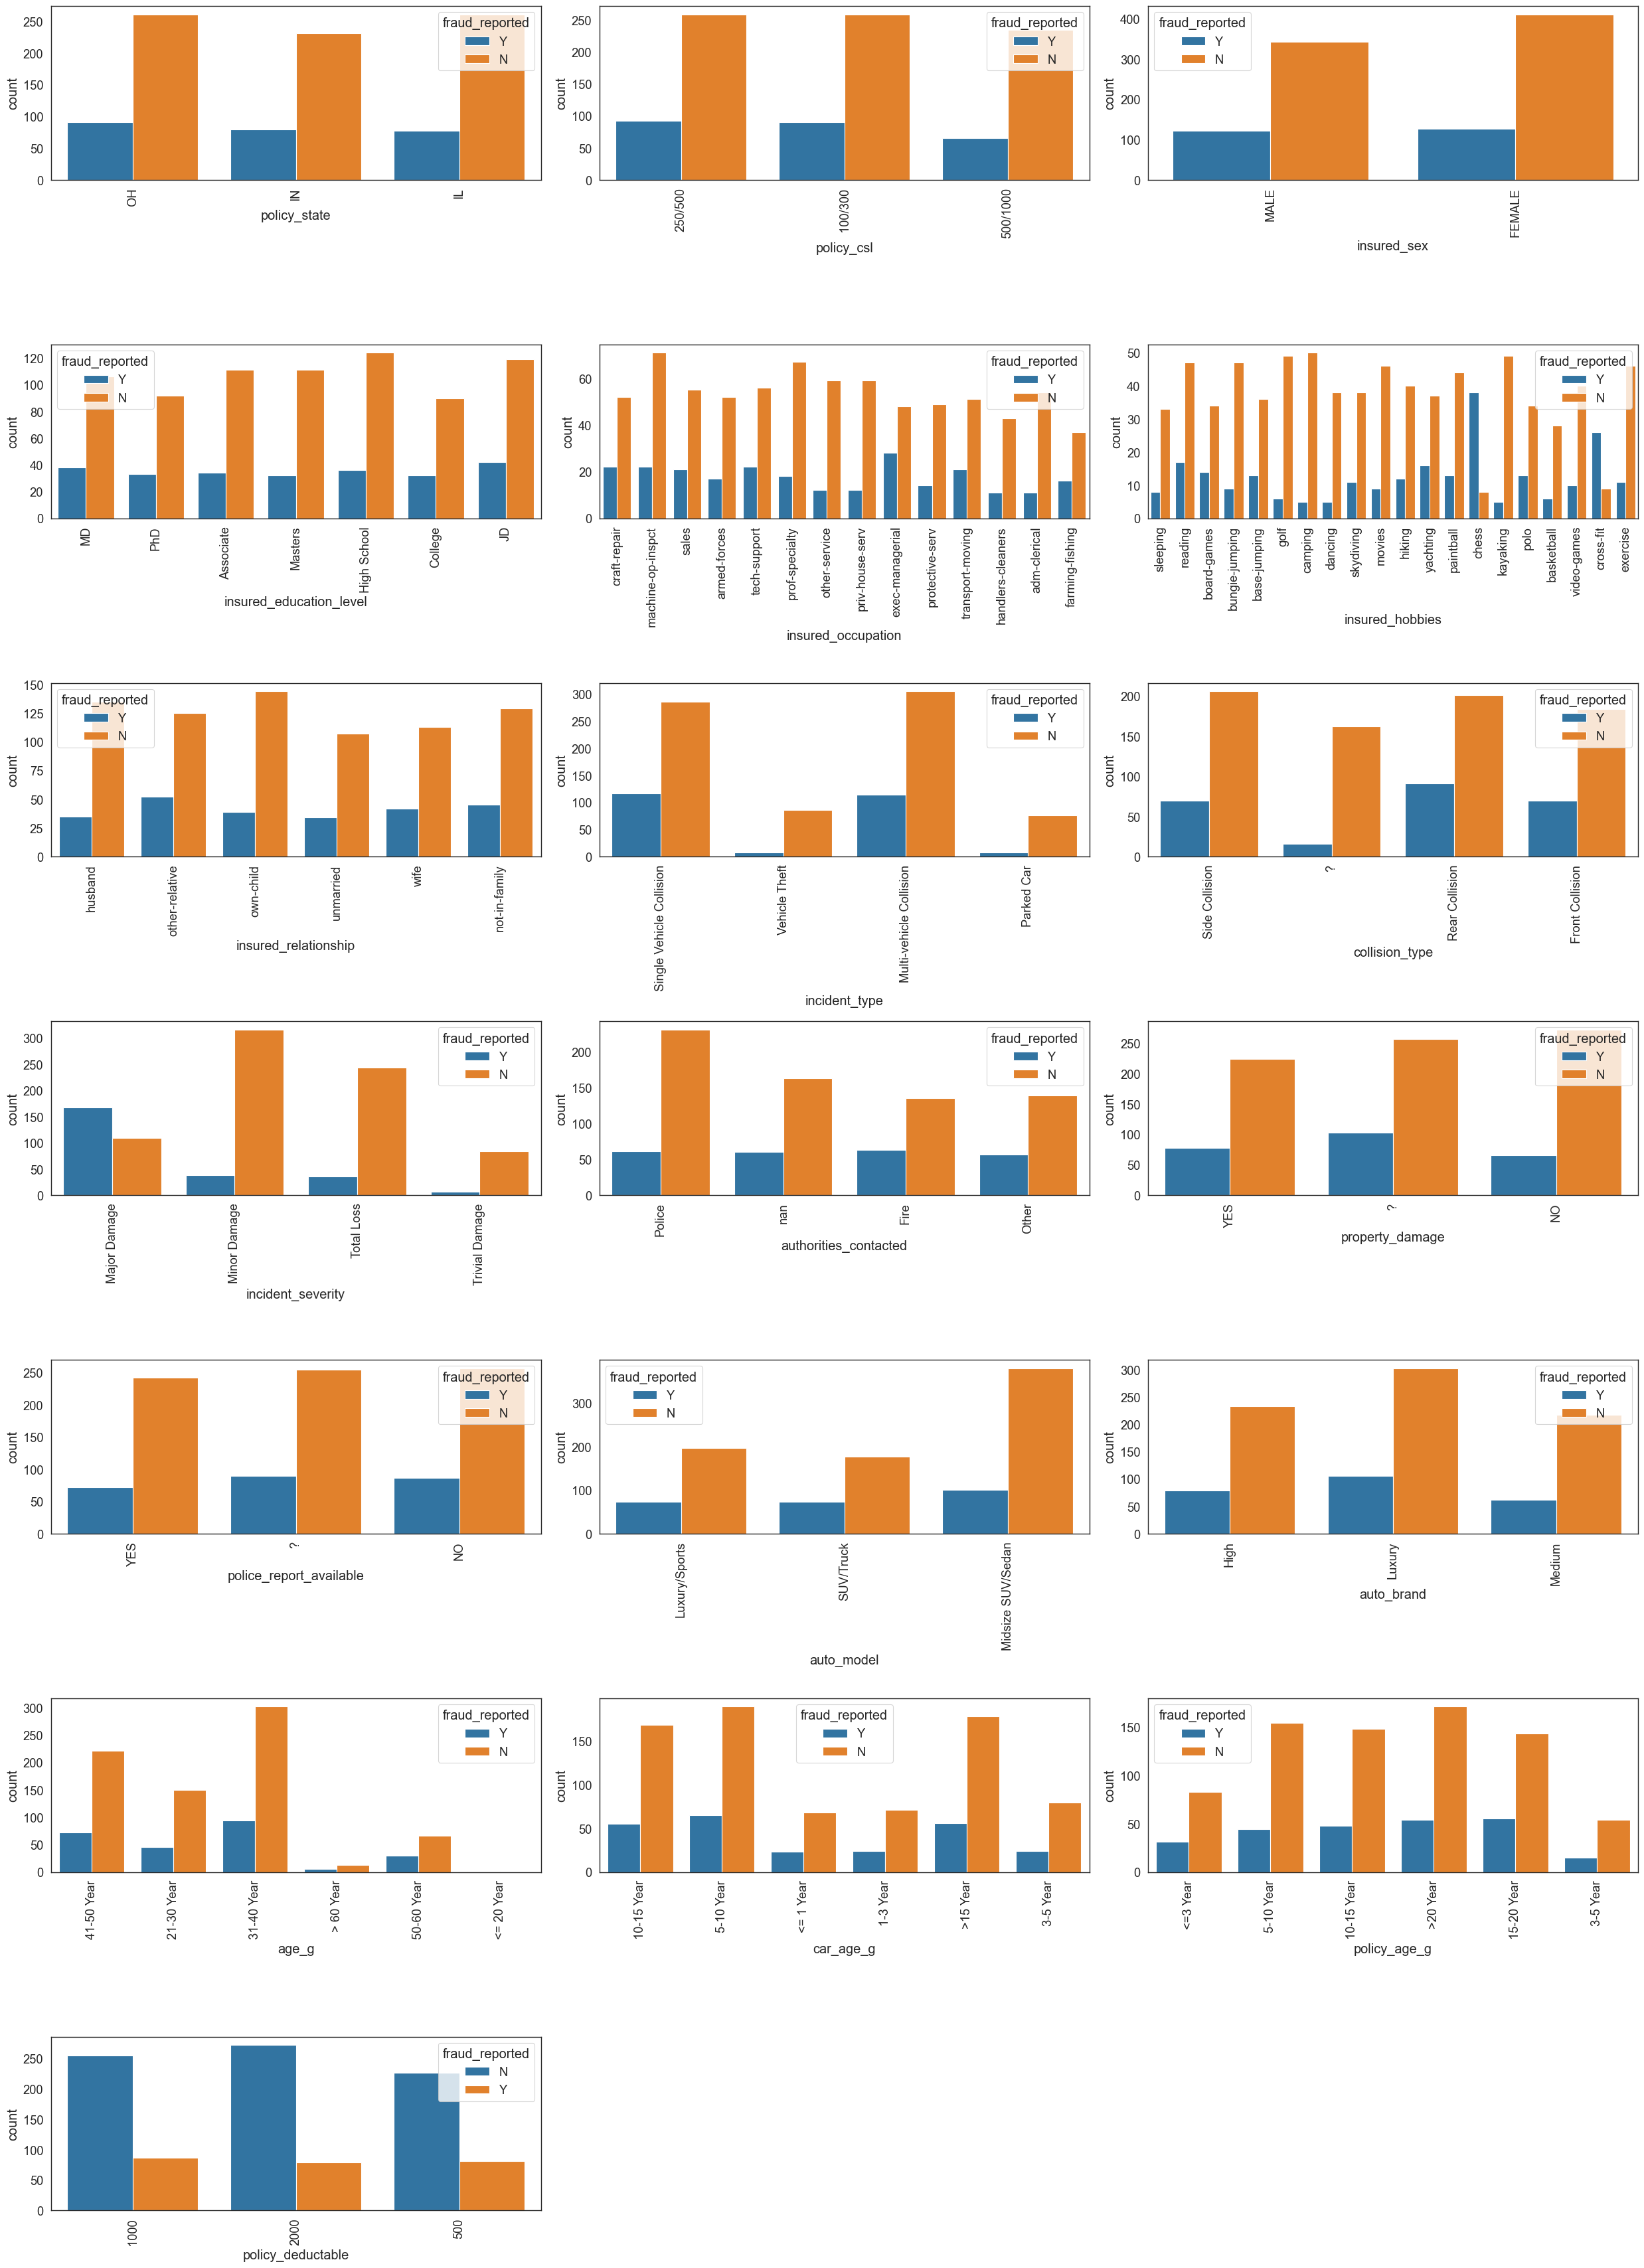

In [17]:
warnings.filterwarnings('ignore')

#parameter = dfa.select_dtypes (include='object').columns.tolist()

parameter =dfa[['policy_state',
                   'policy_csl',
                   'insured_sex',
                   'insured_education_level',
                   'insured_occupation',
                   'insured_hobbies',
                   'insured_relationship',
                   'incident_type',
                   'collision_type',
                   'incident_severity',
                   'authorities_contacted',
                   'property_damage',
                   'police_report_available',
                   'auto_model',
                   'auto_brand',
                   'age_g',
                   'car_age_g',
                   'policy_age_g',
                   'policy_deductable'
                   ]]

                   #'incident_state',
                   #'incident_city',
                   #'incident_location',
                   #'fraud_reported',
                   #'auto_make',
#parameter = parameter.select_dtypes (include='object').columns.tolist()
parameter = parameter.columns.tolist()
#print (parameter)
num_cols=min(len(parameter),3)
num_rows=(len(parameter)+num_cols-1)

fig,axs=plt.subplots(nrows=num_rows,ncols=num_cols, figsize=(25,5*num_rows))

if num_rows>1:
  axs=axs.flatten()

for i, var in enumerate (parameter):
  # sns.countplot(x=var,hue='fraud_reported',data=dfa,ax=axs[i])
  # axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

  sns.countplot(x=var,hue='fraud_reported',data=dfa,ax=axs[i])
  axs[i].set_xticklabels(axs[i].set_xticklabels(dfa[var].unique(),rotation=90))
  axs[i].set_xlabel(var)

for j in range (len(parameter),len(axs)):
  fig.delaxes(axs[j])

fig.tight_layout()
plt.show()
# fig1 = plt.gcf()
# plt.draw()
# fig1.savefig('data.png', dpi=100)


### Preprosessing Mapping Data

In [18]:
df1 = dfa.copy()
df1['fraud_reported'] = df1['fraud_reported'].map({'N':0,'Y':1})
df1['policy_state'] = df1['policy_state'].map({'OH':2,'IN':1,'IL':0})
df1['incident_state'] = df1['incident_state'].map({'SC':4, 'VA':1,'NY':3,'OH':6,'WV':0,'NC':5,'PA':2})
df1['policy_csl'] = df1['policy_csl'].map({'100/300':1,'250/500':2,'500/1000':0})
df1['policy_deductable'] = df1['policy_deductable'].map({2000:1,1000:0,500:2})
df1['police_report_available'] = df1['police_report_available'].map({'NO':1,'YES':0,'?':2})
df1['authorities_contacted'] = df1['authorities_contacted'].map({'nan':int(3),'Police':int(0),'Fire':int(1),'Ambulance':int(2),'Other':int(3)})
df1['authorities_contacted'].fillna(int(3), inplace=True)
df1['incident_severity'] = df1['incident_severity'].map({'Minor Damage':1,'Trivial Damage':0,'Major Damage':3,'Total Loss':2})
df1['property_damage'] = df1['property_damage'].map({'NO':0,'YES':1,'?':2})
df1['auto_brand'] = df1['auto_brand'].map({'Luxury':2,'High':1,'Medium':0})
df1['insured_occupation']=df1['insured_occupation'].map({'craft-repair':12,'machine-op-inspct':7, 'sales':9, 'armed-forces':8,'tech-support':10, 'prof-specialty':5, 'other-service':2,'priv-house-serv':1, 'exec-managerial':14, 'protective-serv':6,'transport-moving':11, 'handlers-cleaners':4, 'adm-clerical':3,'farming-fishing':13})
df1['insured_hobbies']=df1['insured_hobbies'].map({'sleeping':8, 'reading':14, 'board-games':16, 'bungie-jumping':4,
       'base-jumping':13, 'golf':2, 'camping':0, 'dancing':3, 'skydiving':10,
       'movies':5, 'hiking':12, 'yachting':17, 'paintball':11, 'chess':19, 'kayaking':1,
       'polo':15, 'basketball':6, 'video-games':9, 'cross-fit':18, 'exercise':7})
df1['insured_education_level']=df1['insured_education_level'].map({'MD':3,'PhD':5,'Associate':2,'Masters':0,'High School':1,'College':6,'JD':4})
df1['insured_sex'] = df1['insured_sex'].map({'MALE':1,'FEMALE':0})
df1['incident_type'] = df1['incident_type'].map({'Single Vehicle Collision':3, 'Vehicle Theft':0, 'Multi-vehicle Collision':2, 'Parked Car':1})
df1['insured_relationship']=df1['insured_relationship'].map({'husband':0,'other-relative':4,'own-child':1,'unmarried':2,'wife':3,'not-in-family':4})
df1['collision_type'] = df1['collision_type'].map({'Side Collision':1, '?':0, 'Rear Collision':3, 'Front Collision':2})
df1['policy_age_g']= df1['policy_age_g'].map({'<=3 Year':int(5),'3-5 Year':int(0),'5-10 Year':int(1),'10-15 Year':int(3),'15-20 Year':int(4),'>20 Year':int(2)})
df1['age_g']= df1['age_g'].map({'41-50 Year':5, '21-30 Year':0, '31-40 Year':4, '> 60 Year':2,'50-60 Year':3, '<= 20 Year':1})
df1['car_age_g']= df1['car_age_g'].map({'10-15 Year':2, '5-10 Year':5, '<= 1 Year':4, '1-3 Year':3, '>15 Year':1,'3-5 Year':0})
df1['auto_model']= df1['auto_model'].map({'SUV/Truck':2,'Luxury/Sports':1,'Midsize SUV/Sedan':0})
df1=df1.drop([
           'policy_annual_premium',
            'capital-gains',
            'capital-loss',
            'car_age',
            'age_g',
            #'car_age_g',
            'policy_number',
            'auto_model',
            'insured_zip',
            'age','auto_make','months_as_customer','policy_age'],axis=1)
df1.sample(10)

,policy_bind_date,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,auto_brand,incident_year,policy_age_g,car_age_g
44,2007-12-05,0,1,1,0,1,4,1,14,2,...,56400,11280,11280,33840,2014,0,0,2015,1,4
586,1994-03-12,1,1,0,0,1,6,9,17,1,...,4590,510,510,3570,2013,0,2,2015,2,3
470,1997-11-07,2,1,1,0,0,4,12,10,0,...,58300,5830,11660,40810,2014,1,0,2015,4,4
40,1995-05-08,0,1,2,0,1,2,10,1,4,...,40000,8000,4000,28000,2010,0,2,2015,4,0
824,1994-12-11,1,2,2,0,0,3,12,1,4,...,58300,10600,10600,37100,2001,0,1,2015,2,2
763,2003-06-24,1,0,2,0,0,6,3,11,3,...,65560,11920,11920,41720,2015,1,2,2015,3,4
976,1993-11-30,2,0,0,0,0,2,12,16,2,...,70400,14080,7040,49280,2002,0,2,2015,2,2
977,2003-03-06,1,1,2,4000000,1,2,3,16,4,...,53280,4440,8880,39960,2015,1,1,2015,3,4
671,1990-03-28,0,0,1,0,1,0,9,7,4,...,64200,10700,10700,42800,2002,0,1,2015,2,2
513,1994-09-12,0,2,0,0,0,6,11,19,4,...,53730,11940,5970,35820,2013,1,1,2015,2,3


In [19]:
df2 = df1.copy()
df2=df2.drop([
    'policy_bind_date',
    'incident_date',
    'incident_city','incident_location','incident_hour_of_the_day','incident_year','auto_year','vehicle_claim','injury_claim','property_claim'],axis=1)
df2.sample(10)

,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,fraud_reported,auto_brand,policy_age_g,car_age_g
748,0,1,0,0,0,6,7,18,0,2,...,3,1,0,3,2,49400,0,2,3,0
217,2,2,0,0,1,0,11,17,4,0,...,1,2,2,1,1,7200,0,2,4,2
947,0,2,2,6000000,0,0,9,16,1,3,...,1,0,0,3,2,43560,0,1,0,4
68,2,1,0,0,1,3,7,5,1,3,...,1,0,0,3,1,68530,0,2,2,1
566,1,1,2,5000000,0,1,14,3,2,3,...,1,0,2,0,0,54300,0,0,2,0
855,1,2,0,0,1,1,8,1,1,2,...,3,2,1,3,0,49410,0,2,3,4
811,2,2,0,0,0,0,6,3,0,0,...,1,0,0,3,0,4680,0,0,1,3
843,0,0,0,0,1,0,6,0,3,2,...,3,2,0,2,2,54960,1,0,5,2
872,2,1,0,0,0,2,7,19,3,2,...,3,1,0,0,0,52650,1,1,2,2
76,2,0,0,0,0,6,4,2,0,2,...,3,0,1,1,0,89400,0,1,1,1


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   policy_state                 1000 non-null   int64  
 1   policy_csl                   1000 non-null   int64  
 2   policy_deductable            1000 non-null   int64  
 3   umbrella_limit               1000 non-null   int64  
 4   insured_sex                  1000 non-null   int64  
 5   insured_education_level      1000 non-null   int64  
 6   insured_occupation           1000 non-null   int64  
 7   insured_hobbies              1000 non-null   int64  
 8   insured_relationship         1000 non-null   int64  
 9   incident_type                1000 non-null   int64  
 10  collision_type               1000 non-null   int64  
 11  incident_severity            1000 non-null   int64  
 12  authorities_contacted        1000 non-null   float64
 13  incident_state     

In [21]:
# tes=dfa['car_age_g'].unique()
# tes

In [22]:
# def nans(df2): return df2[df.isnull().any(axis=1)]
# nans(df2)

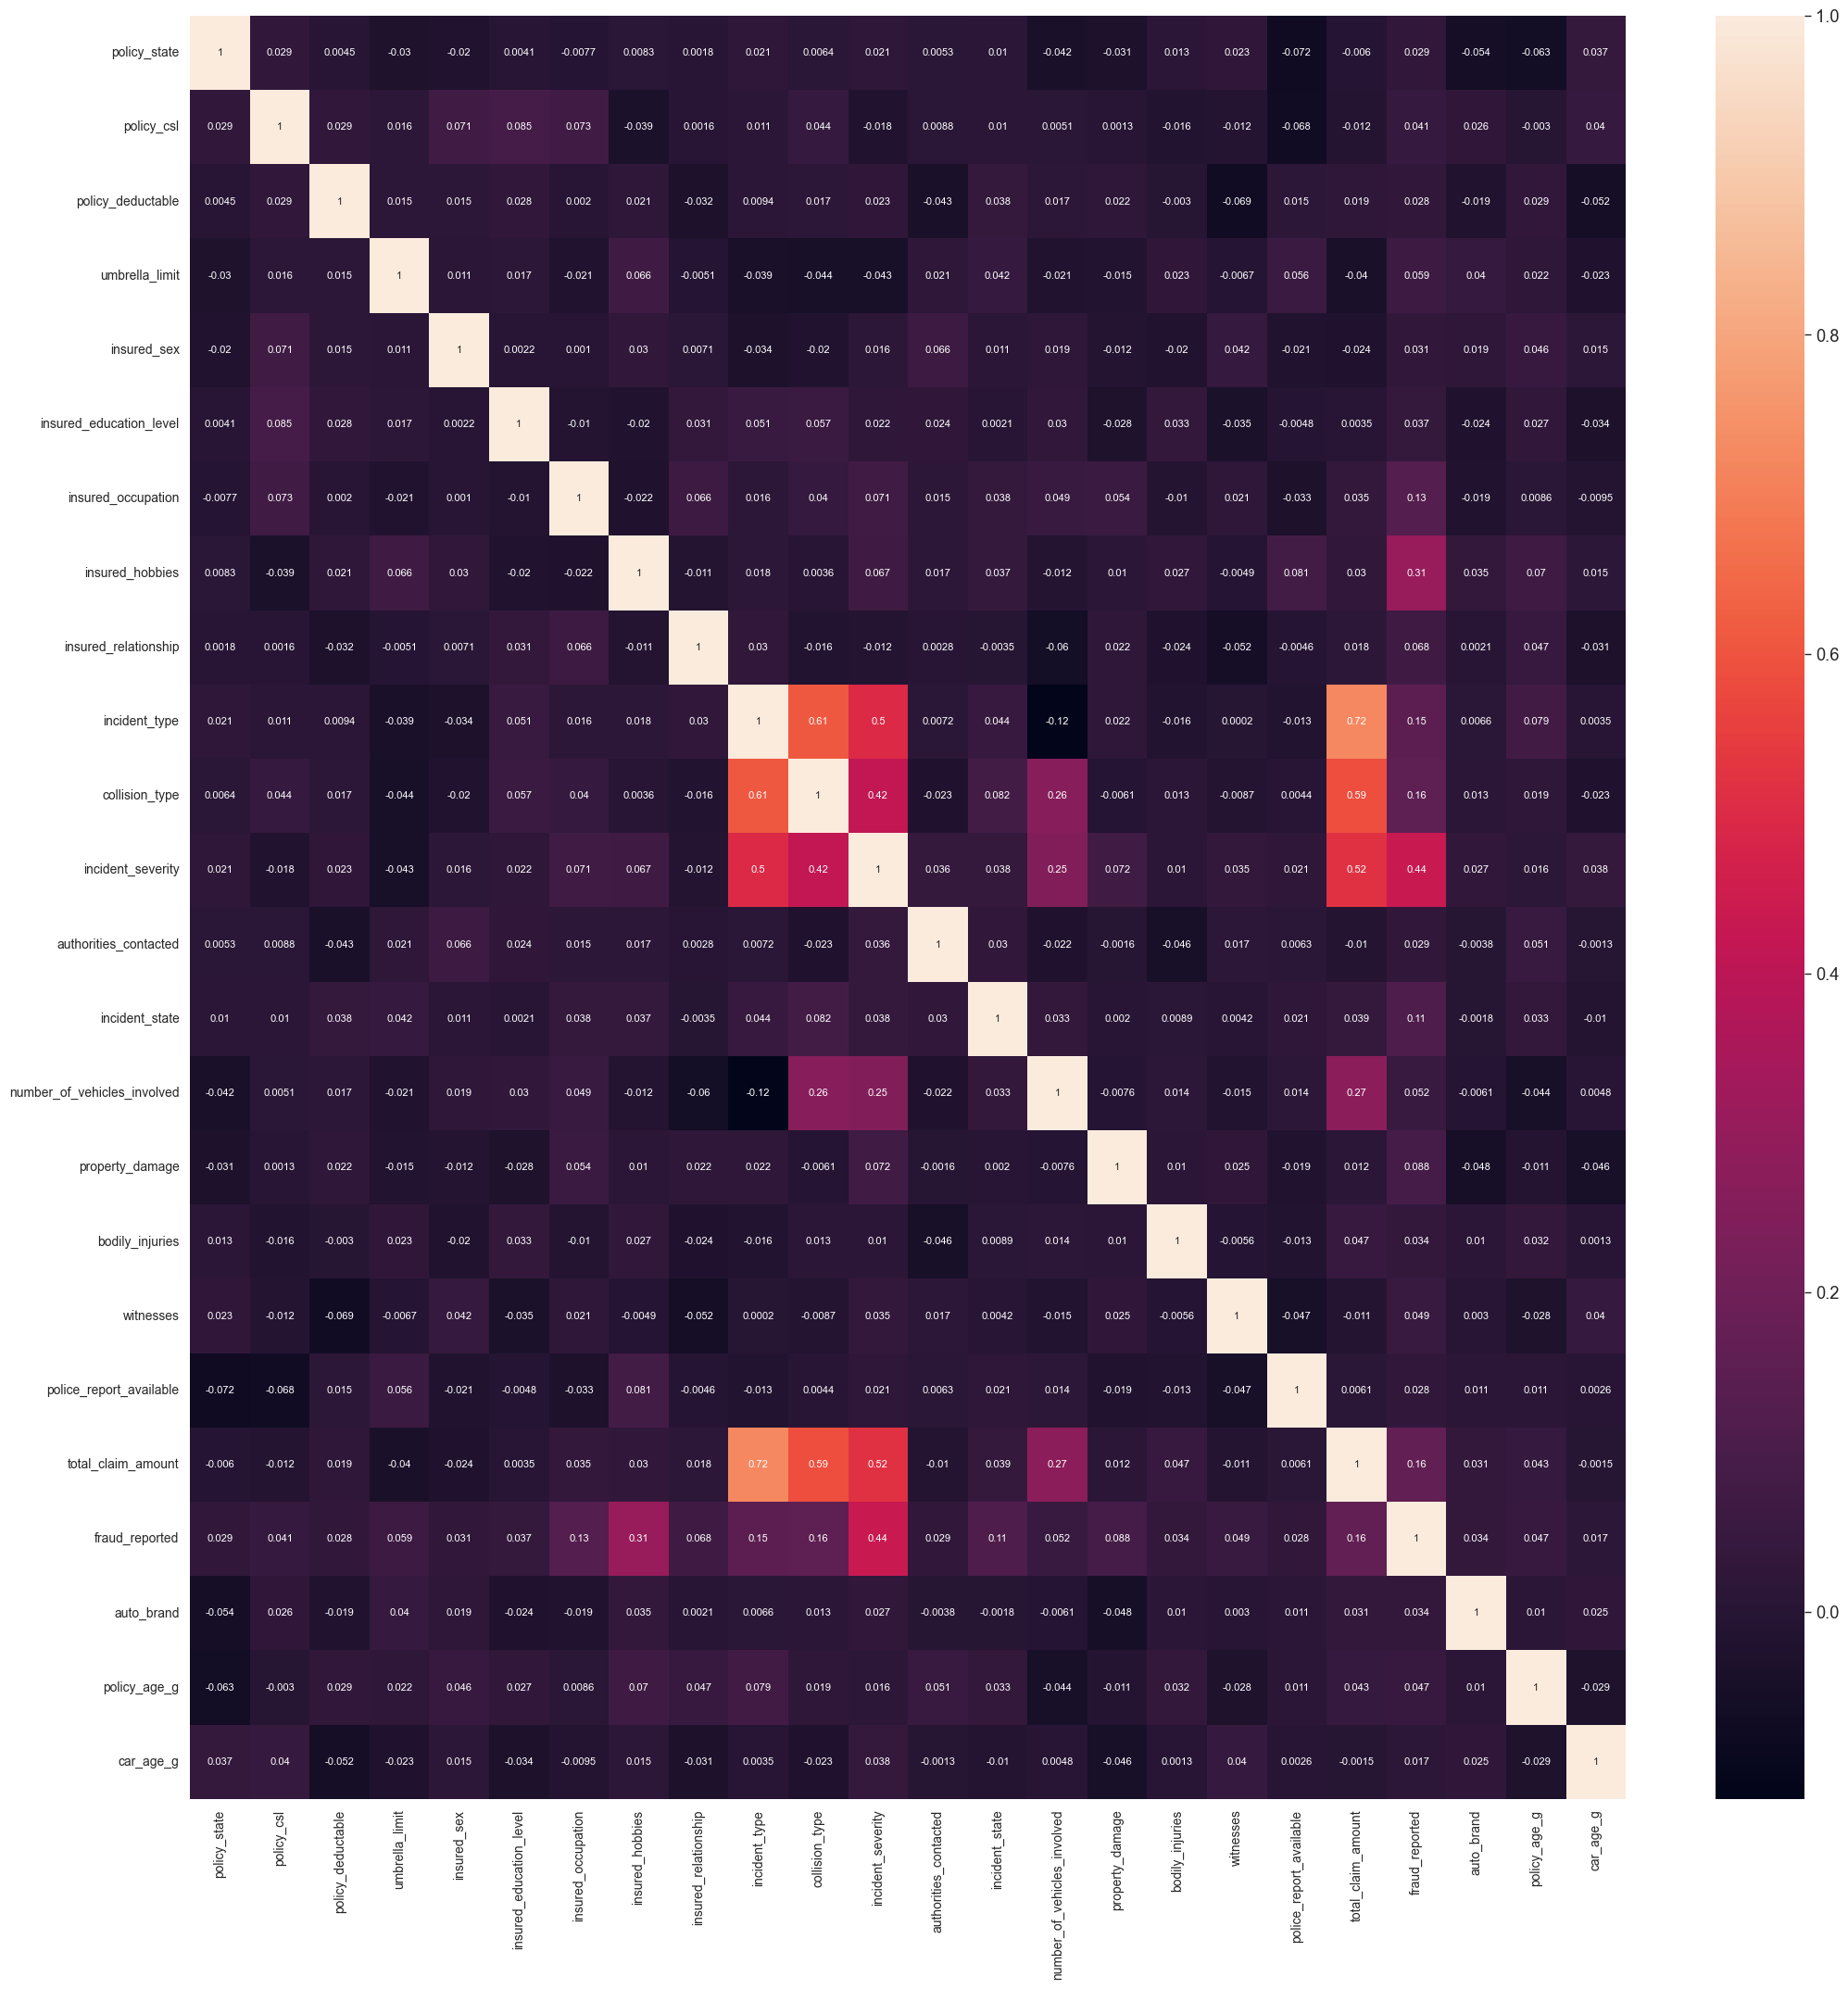

In [23]:
df2_correlation = df2.corr()
sns.heatmap(df2_correlation, xticklabels = df2.columns.values,
            yticklabels = df2_correlation.columns.values, annot = True,
            annot_kws = {'size': 8})
heatmap = plt.gcf()
heatmap.set_size_inches(25, 25)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
# fig2 = plt.gcf()
# plt.draw()
# fig2.savefig('data2.png', dpi=100)

### Preprosessing Scaling dan Spliting Data

In [24]:
X1=df2.drop('fraud_reported',axis=1)
y1=df2['fraud_reported']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=0)
print('Data Train set:', X1_train.shape, y1_train.shape)
print('Data Test set:', X1_test.shape, y1_test.shape)

Data Train set: (700, 23) (700,)
Data Test set: (300, 23) (300,)


In [25]:
scaler2 = MinMaxScaler(feature_range=(0, 1))
X1_train_scaled = scaler2.fit_transform(X1_train)
print (X1_train_scaled)

[[0.  0.5 1.  ... 1.  0.4 0.4]
 [1.  0.5 0.  ... 1.  0.4 0.2]
 [0.5 1.  0.  ... 1.  0.8 0.2]
 ...
 [0.  0.5 0.5 ... 0.5 1.  0.2]
 [0.5 0.5 0.5 ... 0.  0.  0. ]
 [0.5 1.  0.  ... 1.  1.  0.2]]


In [26]:
print (y1_train)

105    0
68     0
479    1
399    0
434    0
      ..
835    0
192    0
629    1
559    0
684    1
Name: fraud_reported, Length: 700, dtype: int64


In [27]:
X1_test_scaled = scaler2.fit_transform(X1_test)
print (X1_test_scaled)

[[1.  1.  0.  ... 1.  0.6 0.6]
 [0.  0.  0.5 ... 0.5 1.  1. ]
 [0.  0.  1.  ... 0.  1.  0.4]
 ...
 [0.5 1.  0.  ... 0.  0.8 0.6]
 [0.  0.5 0.  ... 1.  0.8 1. ]
 [1.  0.5 1.  ... 0.5 0.6 0.4]]


### Decision Tree Model

In [28]:
Model5 = DecisionTreeClassifier(random_state=42)

# hyperparameter
params = {'max_depth': list(range(2, 25)),
          'max_leaf_nodes': list(range(2, 25))}

search_best_model = GridSearchCV(Model5, params, cv=20)

# training model
search_best_model.fit(X1_train_scaled, y1_train)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24]})

In [29]:
# model dengan hyperparameter terbaik
search_best_model.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=18, random_state=42)

In [30]:
model5 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=18, random_state=42)
model5.fit(X1_train_scaled, y1_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=18, random_state=42)

In [31]:
# mengevaluasi model
y_pred5 = model5.predict(X1_test_scaled)
print(y_pred5)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0
 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 1 0 0]


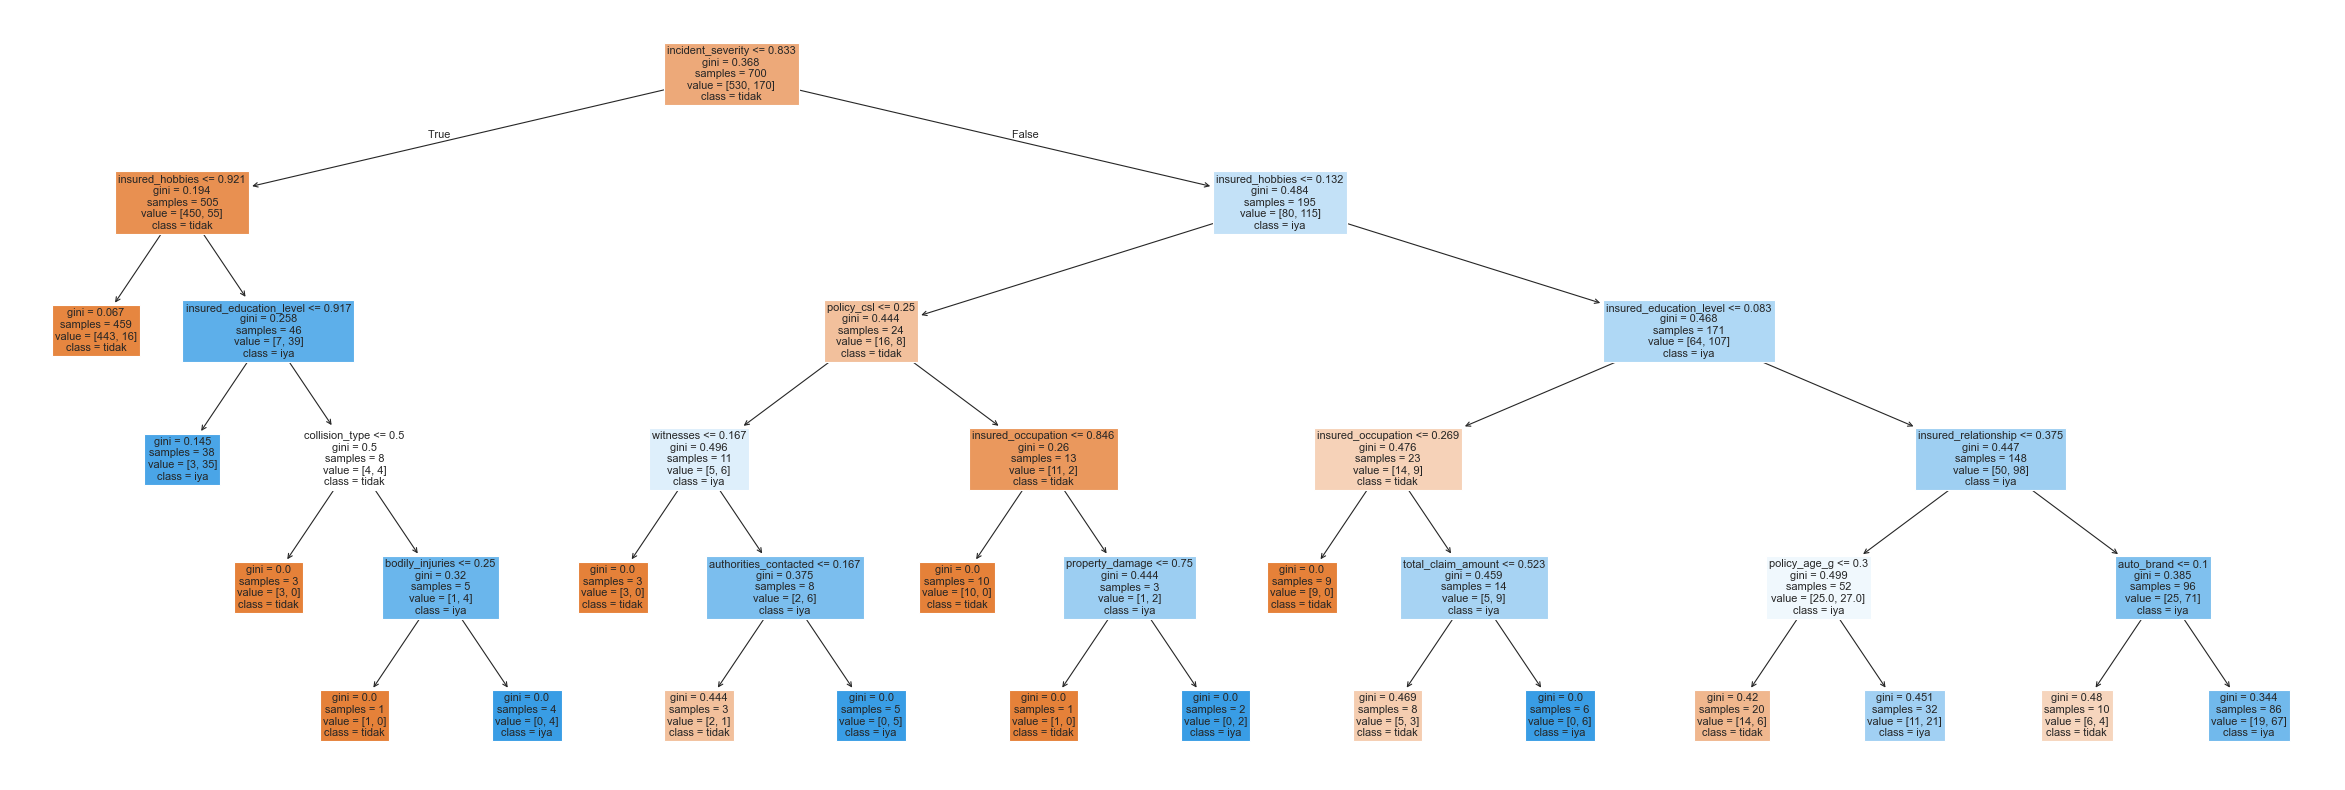

In [55]:
plt.figure(figsize=(30,10))
tree.plot_tree(model5,
               feature_names = df2.columns,
               class_names = ['tidak', 'iya'],
               filled = True)
plt.show()
# fig3 = plt.gcf()
# plt.draw()
# fig3.savefig('data3.png', dpi=100)

In [33]:
print(classification_report(y1_test, y_pred5))
print("accuracy: ", accuracy_score(y1_test, y_pred5))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       223
           1       0.74      0.74      0.74        77

    accuracy                           0.87       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.87      0.87      0.87       300

accuracy:  0.8666666666666667


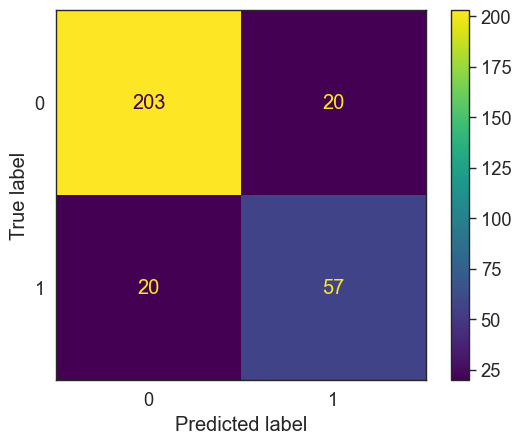

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y1_test,y_pred5,labels=model5.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix = cm, display_labels=model5.classes_)
disp.plot()
plt.show()

### SVM Model Scaled only feature

In [35]:
# model6 = SGDClassifier(max_iter=100, alpha=0.05)
# model6.fit(X1_train_scaled, y1_train)
# y_pred6 = model6.predict(X1_test_scaled)
# print(y_pred6)
model6=SVC(kernel = 'linear', random_state = 0)
model6.fit(X1_train_scaled, y1_train)
y_pred6 = model6.predict(X1_test_scaled)
print(y_pred6)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 0 0]


In [36]:
#Mengevaluasi kinerja model dengan metrices precision, recall, f1-score
print(classification_report(y1_test, y_pred6))
print("accuracy: ", accuracy_score(y1_test, y_pred6))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       223
           1       0.79      0.48      0.60        77

    accuracy                           0.83       300
   macro avg       0.81      0.72      0.75       300
weighted avg       0.83      0.83      0.82       300

accuracy:  0.8333333333333334


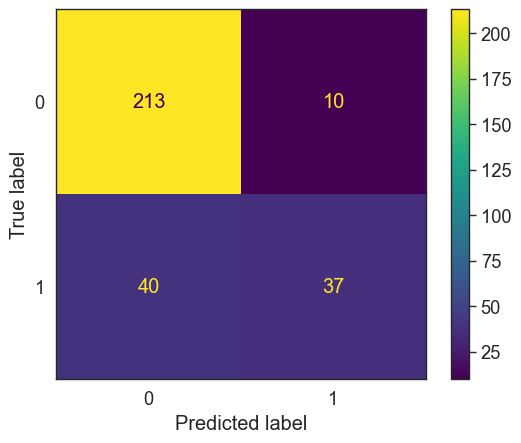

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y1_test,y_pred6,labels=model6.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix = cm, display_labels=model5.classes_)
disp.plot()
plt.show()

### KNN Model Scaled only feature

In [38]:
# Tulis di sini
Ks = 30

accuracies = []
precision = []
recall = []

# Looping dari k=1 sampai dengan k=10
for k in range (1,Ks):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X1_train_scaled,y1_train)

  y_pred7 = knn.predict(X1_test_scaled)

  accuracies.append(metrics.accuracy_score(y1_test,y_pred7))
  precision.append(metrics.precision_score(y1_test,y_pred7))
  recall.append(metrics.recall_score(y1_test,y_pred7))

  print ('k =', k)
  print ('Accuracy =',metrics.accuracy_score(y1_test,y_pred7))
  print ('Precision =',metrics.precision_score(y1_test,y_pred7))
  print ('Recall =',metrics.recall_score(y1_test,y_pred7))

k = 1
Accuracy = 0.6766666666666666
Precision = 0.3611111111111111
Recall = 0.33766233766233766
k = 2
Accuracy = 0.72
Precision = 0.3333333333333333
Recall = 0.09090909090909091
k = 3
Accuracy = 0.6933333333333334
Precision = 0.3584905660377358
Recall = 0.24675324675324675
k = 4
Accuracy = 0.73
Precision = 0.4
Recall = 0.1038961038961039
k = 5
Accuracy = 0.72
Precision = 0.40540540540540543
Recall = 0.19480519480519481
k = 6
Accuracy = 0.7366666666666667
Precision = 0.4166666666666667
Recall = 0.06493506493506493
k = 7
Accuracy = 0.7166666666666667
Precision = 0.3333333333333333
Recall = 0.1038961038961039
k = 8
Accuracy = 0.74
Precision = 0.4
Recall = 0.025974025974025976
k = 9
Accuracy = 0.75
Precision = 0.5833333333333334
Recall = 0.09090909090909091
k = 10
Accuracy = 0.74
Precision = 0.4
Recall = 0.025974025974025976
k = 11
Accuracy = 0.7333333333333333
Precision = 0.2857142857142857
Recall = 0.025974025974025976
k = 12
Accuracy = 0.74
Precision = 0.4
Recall = 0.025974025974025976


In [39]:
# Tulis di sini
k = 9

# K-nearest neighbour
model7 = KNeighborsClassifier(n_neighbors = k,metric='euclidean')
model7.fit(X1_train_scaled, y1_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [40]:
# Tulis di sini
y_pred7 = model7.predict(X1_test_scaled)
print(y_pred7)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [41]:
#Mengevaluasi kinerja model dengan metrices precision, recall, f1-score
print(classification_report(y1_test, y_pred7))
print("accuracy: ", accuracy_score(y1_test, y_pred7))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85       223
           1       0.58      0.09      0.16        77

    accuracy                           0.75       300
   macro avg       0.67      0.53      0.51       300
weighted avg       0.71      0.75      0.67       300

accuracy:  0.75


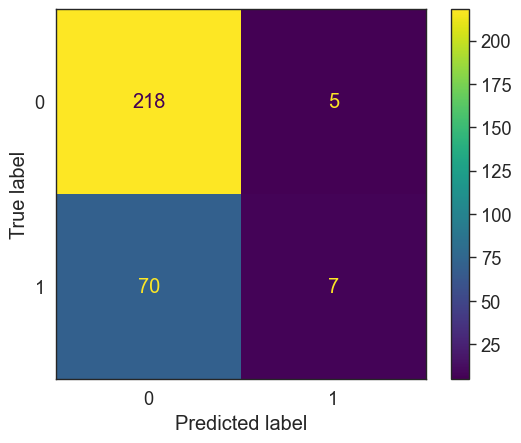

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y1_test,y_pred7,labels=model7.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix = cm, display_labels=model7.classes_)
disp.plot()
plt.show()

### Logistic Regression Scaled only Feature

In [43]:
model8 = LogisticRegression()
model8.fit(X1_train_scaled, y1_train)

LogisticRegression()

In [44]:
#test the model
predictions8 = model8.predict(X1_test_scaled)
print(predictions8)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 0 0]


In [45]:
#Mengevaluasi kinerja model dengan metrices precision, recall, f1-score
print(classification_report(y1_test, predictions8))
print("accuracy: ", accuracy_score(y1_test, predictions8))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       223
           1       0.77      0.44      0.56        77

    accuracy                           0.82       300
   macro avg       0.80      0.70      0.73       300
weighted avg       0.82      0.82      0.81       300

accuracy:  0.8233333333333334


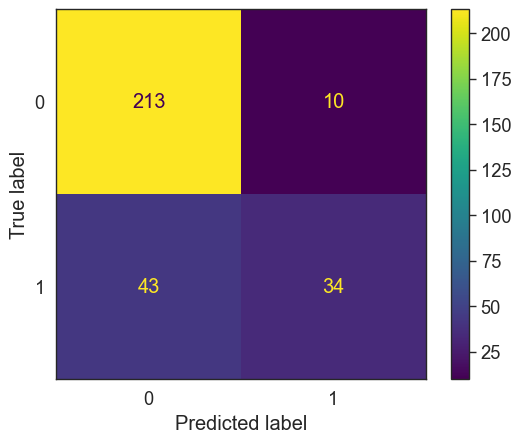

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y1_test,predictions8,labels=model8.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix = cm, display_labels=model8.classes_)
disp.plot()
plt.show()

### XGBOOST Scaled only Feature

In [47]:
from sklearn.model_selection import RandomizedSearchCV
param_dist1 = {
    'max_depth': stats.randint(3, 23),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist1, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X1_train_scaled, y1_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.019280535533499125, 'max_depth': 10, 'n_estimators': 144, 'subsample': 0.5347052864053502}
Best score:  0.8600000000000001


In [48]:
model9 =xgb.XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.0522275,
    )

In [49]:
model9.fit(X1_train_scaled, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0522275,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
predictions9 = model9.predict(X1_test_scaled)
print(predictions9)

[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0
 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 1 0 0]


In [51]:
#Mengevaluasi kinerja model dengan metrices precision, recall, f1-score
print(classification_report(y1_test, predictions9))
print("accuracy: ", accuracy_score(y1_test, predictions9))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       223
           1       0.74      0.75      0.75        77

    accuracy                           0.87       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.87      0.87      0.87       300

accuracy:  0.87


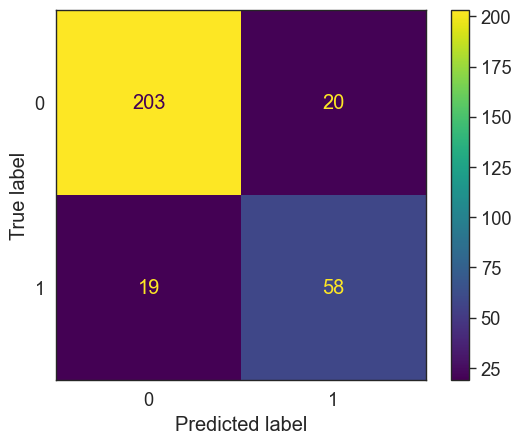

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y1_test,predictions9,labels=model9.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix = cm, display_labels=model9.classes_)
disp.plot()
plt.show()

### Download Model

In [53]:

# pickle.dump(scaler2,open('C:/Users/andry/Documents/project_adv/model/scaler2_ds.pkl','wb'))
# pickle.dump(model5,open('C:/Users/andry/Documents/project_adv/model/DecisionTree_ds.pkl','wb'))
# pickle.dump(model6,open('C:/Users/andry/Documents/project_adv/model/SVM2_ds.pkl','wb'))
# pickle.dump(model7,open('C:/Users/andry/Documents/project_adv/model/KNN2_ds.pkl','wb'))
# pickle.dump(model8,open('C:/Users/andry/Documents/project_adv/model/LogisticReg2_ds.pkl','wb'))
# pickle.dump(model9,open('C:/Users/andry/Documents/project_adv/model/XGBoost_ds.pkl','wb'))